In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from FeatureStatCalulateFile import FeatureStat

In [3]:
# Preview of the Data: 
# Reading the data into a pandas data frame with defined column names and dropping null values will allow us to achive the processing above
# Define column names
column_names = ['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']
# Read the file, skipping bad lines
data = pd.read_csv('data/WISDM_ar_v1.1_raw.txt', sep=',', names=column_names, on_bad_lines='skip')
# drop null values: 
data = data.dropna()

data['z-axis'] = data['z-axis'].str.rstrip(';').astype(float)

In [4]:
# create window sizes: 

def get_windows(df, window_size, step_size):

    x_list = []
    y_list = []
    z_list = []
    activity_list = []
    for i in range(0, df.shape[0] - window_size, step_size):
        xs = df['x-axis'].values[i : i + window_size]
        ys = df['y-axis'].values[i : i + window_size]
        zs = df['z-axis'].values[i : i + window_size]
        label = df['activity'][i : i + window_size].mode()[0]

        x_list.append(xs)
        y_list.append(ys)
        z_list.append(zs)
        activity_list.append(label)
    return x_list, y_list, z_list, activity_list
        

In [5]:
df_8 = data[data['user'] == 8]

In [6]:
df_8['activity'].value_counts()

activity
Walking       17108
Jogging       10313
Upstairs       4453
Downstairs     3346
Standing       3269
Sitting        2699
Name: count, dtype: int64

In [7]:
Walking = df_8[df_8['activity'] == 'Walking'].head(2699)
Jogging = df_8[df_8['activity'] == 'Jogging'].head(2699)
Upstairs = df_8[df_8['activity'] == 'Upstairs'].head(2699)
Downstairs = df_8[df_8['activity'] == 'Downstairs'].head(2699)
Sitting = df_8[df_8['activity'] == 'Sitting'].head(2699)
Standing = df_8[df_8['activity'] == 'Standing'].head(2699)

In [8]:
data_bal = pd.DataFrame
data_bal = pd.concat([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])

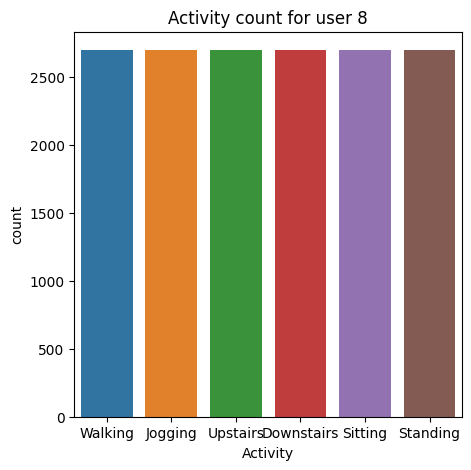

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(x='activity', data=data_bal, hue='activity')
plt.xlabel('Activity')
plt.title('Activity count for user 8')
plt.show()

In [10]:
X = pd.DataFrame()

In [11]:
x_list, y_list, z_list, activity_list = get_windows(data_bal, 100, 50)

In [12]:
featured_data = FeatureStat(X, x_list, y_list, z_list)

In [13]:
X = featured_data.all()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
y = pd.Series(activity_list)  # Corresponding labels

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

# Verify the splits
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (257, 59) (257,)
Test set shape: (65, 59) (65,)


In [16]:
scaler = StandardScaler()
X_train  = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [18]:
decisionTree = DecisionTreeClassifier(random_state=41)
cv_scores_dt = cross_val_score(decisionTree, X_train, y_train, cv=skf, scoring='accuracy')
decisionTree.fit(X_train, y_train)
dT_yPred = decisionTree.predict(X_test)
dT_accuracy = accuracy_score(y_test, dT_yPred)
print(f"Decision Tree Accuracy on test set: {dT_accuracy * 100:.2f}%")
print("Decision Tree Cross-Validation Scores:", cv_scores_dt)
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores_dt) * 100:.2f}%")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dT_yPred))

Decision Tree Accuracy on test set: 96.92%
Decision Tree Cross-Validation Scores: [0.96153846 1.         1.         1.         0.96153846 0.96153846
 1.         0.96       1.         0.92      ]
Mean Cross-Validation Accuracy: 97.65%

Decision Tree Classification Report:
              precision    recall  f1-score   support

  Downstairs       1.00      0.91      0.95        11
     Jogging       0.92      1.00      0.96        11
     Sitting       1.00      1.00      1.00        11
    Standing       0.92      1.00      0.96        11
    Upstairs       1.00      0.91      0.95        11
     Walking       1.00      1.00      1.00        10

    accuracy                           0.97        65
   macro avg       0.97      0.97      0.97        65
weighted avg       0.97      0.97      0.97        65



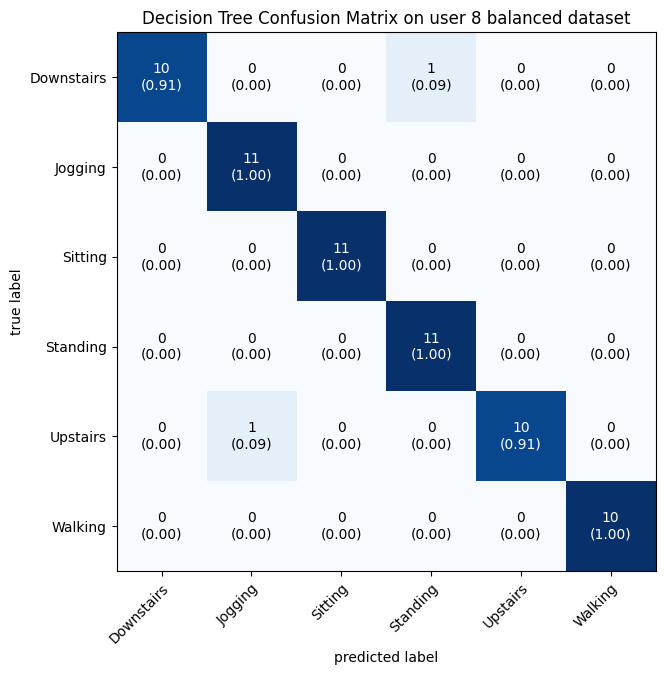

In [19]:
dT_cm = confusion_matrix(y_test, dT_yPred)
plot_confusion_matrix(dT_cm, class_names=decisionTree.classes_, show_normed=True, figsize=(7,7))
plt.title("Decision Tree Confusion Matrix on user 8 balanced dataset")
plt.show()

In [24]:
# Random Forest with Cross-Validation
randomForest = RandomForestClassifier(random_state=1)
cv_scores_rf = cross_val_score(randomForest, X_train, y_train, cv=skf, scoring='accuracy')
randomForest.fit(X_train, y_train)
rF_yPred = randomForest.predict(X_test)
rF_accuracy = accuracy_score(y_test, rF_yPred)

print(f"Random Forest Accuracy on test set: {rF_accuracy * 100:.2f}%")
print("Random Forest Cross-Validation Scores:", cv_scores_rf)
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores_rf) * 100:.2f}%")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rF_yPred))

Random Forest Accuracy on test set: 98.46%
Random Forest Cross-Validation Scores: [1.         1.         1.         1.         0.88461538 1.
 1.         0.96       1.         1.        ]
Mean Cross-Validation Accuracy: 98.45%

Random Forest Classification Report:
              precision    recall  f1-score   support

  Downstairs       1.00      1.00      1.00        11
     Jogging       0.92      1.00      0.96        11
     Sitting       1.00      1.00      1.00        11
    Standing       1.00      1.00      1.00        11
    Upstairs       1.00      0.91      0.95        11
     Walking       1.00      1.00      1.00        10

    accuracy                           0.98        65
   macro avg       0.99      0.98      0.98        65
weighted avg       0.99      0.98      0.98        65



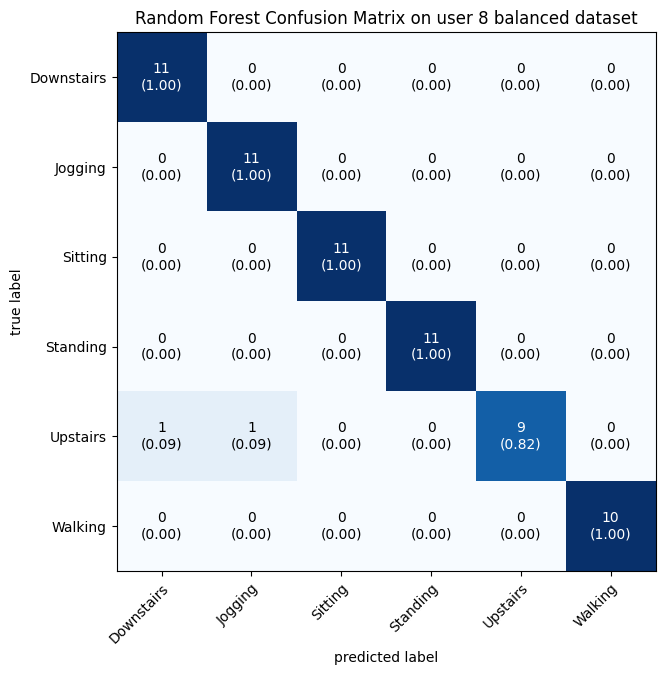

In [21]:
rF_cm = confusion_matrix(y_test, rF_yPred)
plot_confusion_matrix(rF_cm, class_names=decisionTree.classes_, show_normed=True, figsize=(7,7))
plt.title("Random Forest Confusion Matrix on user 8 balanced dataset")
plt.show()